<a href="https://colab.research.google.com/github/chincholikarsalil/BE_project/blob/match_analysis/match_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# <center>Predictive Analytics of Football
---
#### <center> **Group no. 12**  
####<center>Salil Chincholikar, Niharika Sadul, Parth Thakkar, Ashutosh Amrutkar
####<center>Guide - Mr. Nikhil Dhavase
---
# <center>Match Analysis
---

###Initial steps

The dataset we are using for this part is from the data science community Kaggle https://www.kaggle.com/secareanualin/football-events.
This dataset is used to perform exploratory data analysis of the football Matches. 

In [0]:
from google.colab import drive 
drive.mount('/mntDrive') 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import zipfile
%matplotlib inline 
import numpy as np 
import scipy as sp 
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import pandas as pd 
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')


In [0]:
from xgboost import XGBClassifier
import sklearn
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [0]:
events = pd.read_csv('/content/drive/My Drive/google_colab/Datasets/Match/events.csv')
game_info=pd.read_csv('/content/drive/My Drive/google_colab/Datasets/Match/ginf.csv')
print("Events shape - ", events.shape())
print("Game Info shape - ", ginf.shape())

In [0]:
events.head()     

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0


In [0]:
events.describe()

,sort_order,time,event_type,event_type2,side,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
count,941009.000000,941009.000000,941009.000000,214293.000000,941009.000000,227459.000000,228498.000000,941009.000000,467067.000000,229185.000000,941009.000000,229137.000000,941009.000000
mean,53.858826,49.663663,4.326575,12.233764,1.481170,5.733693,1.926555,0.025978,6.209073,1.624831,0.264332,1.281316,0.004876
std,32.014268,26.488977,2.995313,0.468850,0.499646,3.326100,0.797055,0.159071,5.421736,0.740400,0.655501,0.709394,0.069655
min,1.000000,0.000000,1.000000,12.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,27.000000,27.000000,2.000000,12.000000,1.000000,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,53.000000,51.000000,3.000000,12.000000,1.000000,5.000000,2.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000
75%,79.000000,73.000000,8.000000,12.000000,2.000000,9.000000,3.000000,0.000000,11.000000,2.000000,0.000000,1.000000,0.000000
max,180.000000,100.000000,11.000000,15.000000,2.000000,13.000000,4.000000,1.000000,19.000000,3.000000,4.000000,4.000000,1.000000


In [0]:
events.columns

Index(['id_odsp', 'id_event', 'sort_order', 'time', 'text', 'event_type', 'event_type2', 'side', 'event_team', 'opponent', 'player', 'player2', 'player_in', 'player_out', 'shot_place', 'shot_outcome', 'is_goal', 'location', 'bodypart', 'assist_method', 'situation', 'fast_break'], dtype='object')

In [0]:
events.isnull().sum()

id_odsp               0
id_event              0
sort_order            0
time                  0
text                  0
event_type            0
event_type2      726716
side                  0
event_team            0
opponent              0
player            61000
player2          649699
player_in        889294
player_out       889271
shot_place       713550
shot_outcome     712511
is_goal               0
location         473942
bodypart         711824
assist_method         0
situation        711872
fast_break            0
dtype: int64

###Analysing Goals Scored


In [0]:
goals=events[events["is_goal"]==1]

Analysing goals against timing


Text(0.5, 1.0, 'Number of goals against Time during match')

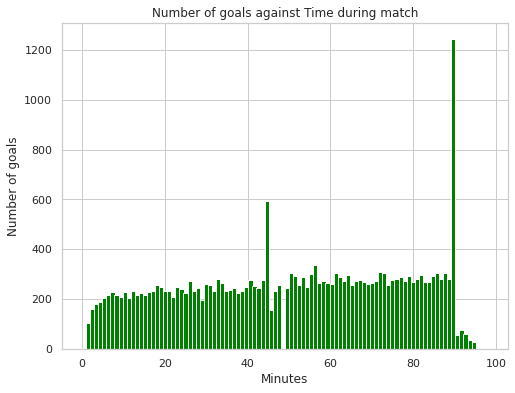

In [0]:
fig=plt.figure(figsize=(8,6))
plt.hist(goals.time,width=1,bins=100,color="green")   #100 so 1 bar per minute
plt.xlabel("Minutes")
plt.ylabel("Number of goals")
plt.title("Number of goals against Time during match")

Analysing Home/Away Goals


Text(0.5, 1.0, 'Number of goals (by home/away side) against Time during match')

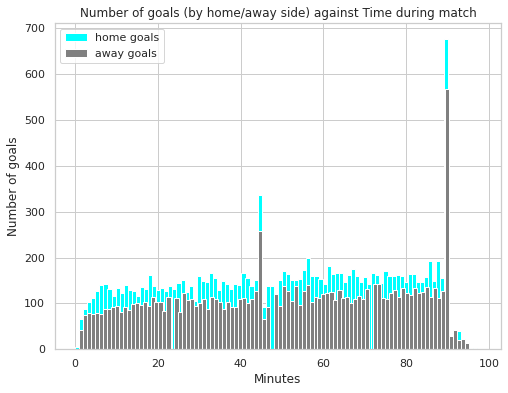

In [0]:
fig=plt.figure(figsize=(8,6))
plt.hist(goals[goals["side"]==1]["time"],width=1,bins=100,color="cyan",label="home goals")   
plt.hist(goals[goals["side"]==2]["time"],width=1,bins=100,color="grey",label="away goals") 
plt.xlabel("Minutes")
plt.ylabel("Number of goals")
plt.legend()
plt.title("Number of goals (by home/away side) against Time during match")

findfont: Font family ['Times New Roman Bold'] not found. Falling back to DejaVu Sans.


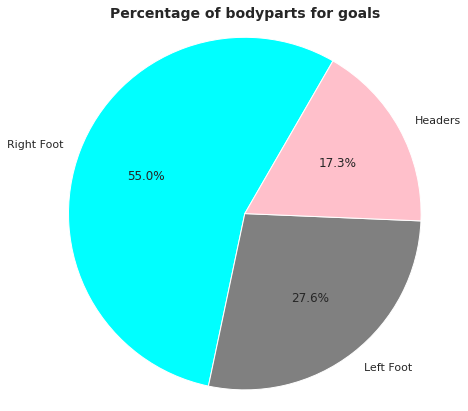

In [0]:
labels=["Right Foot","Left Foot","Headers"]
sizes=[goals[goals["bodypart"]==1].shape[0],goals[goals["bodypart"]==2].shape[0],goals[goals["bodypart"]==3].shape[0]]
colors=["cyan","grey","pink"]
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',startangle=60)
plt.axis('equal')
plt.title("Percentage of bodyparts for goals",fontname="Times New Roman Bold",fontsize=14,fontweight="bold")
fig=plt.gcf() 
fig.set_size_inches(7,7)

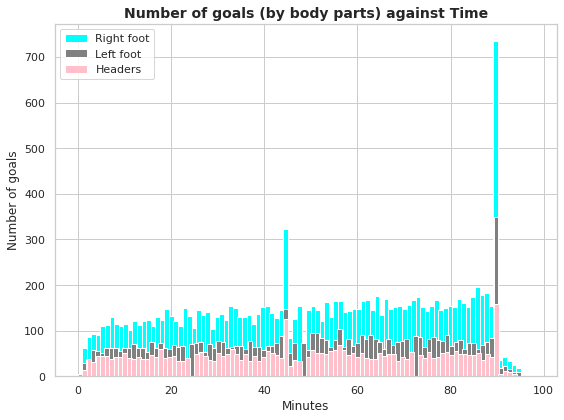

In [0]:
fig=plt.figure(figsize=(8,6))
plt.hist(goals[goals["bodypart"]==1]["time"],width=1,bins=100,color="cyan",label="Right foot")   
plt.hist(goals[goals["bodypart"]==2]["time"],width=1,bins=100,color="grey",label="Left foot") 
plt.hist(goals[goals["bodypart"]==3]["time"],width=1,bins=100,color="pink",label="Headers") 
plt.xlabel("Minutes")
plt.ylabel("Number of goals")
plt.legend()
plt.title("Number of goals (by body parts) against Time",fontname="Times New Roman Bold",fontsize=14,fontweight="bold")
plt.tight_layout()

###Cards against Time


Yellow Cards against Time


Text(0.5, 1.0, 'Number of yellow cards against Time during match')

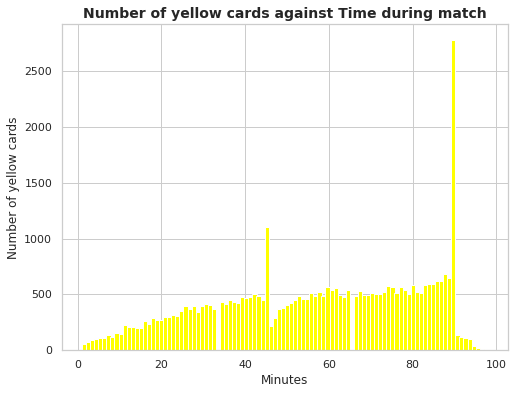

In [0]:
yel_card=events[events["event_type"]==4]
plt.figure(figsize=(8,6))
plt.hist(yel_card.time,width=1,bins=100,color="yellow")   
plt.xlabel("Minutes")
plt.ylabel("Number of yellow cards")
plt.title("Number of yellow cards against Time during match",fontname="Times New Roman Bold",fontsize=14,fontweight="bold")

Red Cards against Time


Text(0.5, 1.0, 'Number of red cards against Time during match')

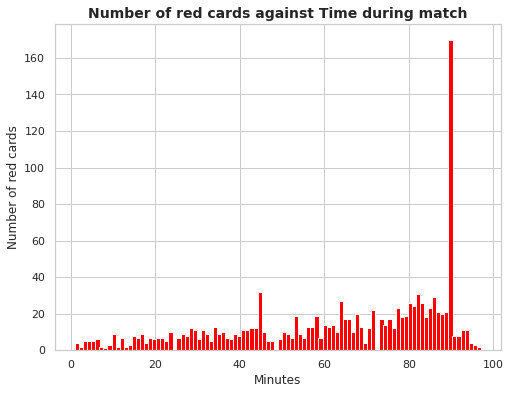

In [0]:
sec_yellow=events[events["event_type"]==5]
red=events[events["event_type"]==6]
reds=[sec_yellow,red]
red_cards=pd.concat(reds)
fig=plt.figure(figsize=(8,6))
plt.hist(red_cards.time,width=1,bins=100,color="red")   
plt.xlabel("Minutes")
plt.ylabel("Number of red cards")
plt.title("Number of red cards against Time during match",fontname="Times New Roman Bold",fontsize=14,fontweight="bold")

###Handling events

In [0]:
encoding = pd.read_table('/content/drive/My Drive/google_colab/Datasets/Match/dictionary.txt', delim_whitespace=False, names=('num','events'))
event_type=encoding[1:13]
event_type_2=encoding[14:18]
side=encoding[19:21]
shot_place=encoding[22:35]
shot_outcome=encoding[36:40]
location=encoding[41:60]
bodypart=encoding[61:64]
assist_method=encoding[65:70]
situation=encoding[71:75]

In [0]:
event_type

,num,events
1,0,Announcement
2,1,Attempt
3,2,Corner
4,3,Foul
5,4,Yellow card
6,5,Second yellow card
7,6,Red card
8,7,Substitution
9,8,Free kick won
10,9,Offside


In [0]:
event_type_2

,num,events
14,12,Key Pass
15,13,Failed through ball
16,14,Sending off
17,15,Own goal


In [0]:
side

,num,events
19,1,Home
20,2,Away


In [0]:
shot_place

,num,events
22,1,Bit too high
23,2,Blocked
24,3,Bottom left corner
25,4,Bottom right corner
26,5,Centre of the goal
27,6,High and wide
28,7,Hits the bar
29,8,Misses to the left
30,9,Misses to the right
31,10,Too high


In [0]:
shot_outcome

,num,events
36,1,On target
37,2,Off target
38,3,Blocked
39,4,Hit the bar


In [0]:
location

,num,events
41,1,Attacking half
42,2,Defensive half
43,3,Centre of the box
44,4,Left wing
45,5,Right wing
46,6,Difficult angle and long range
47,7,Difficult angle on the left
48,8,Difficult angle on the right
49,9,Left side of the box
50,10,Left side of the six yard box


In [0]:
bodypart

,num,events
61,1,right foot
62,2,left foot
63,3,head


In [0]:
assist_method

,num,events
65,0,None
66,1,Pass
67,2,Cross
68,3,Headed pass
69,4,Through ball


In [0]:
situation

,num,events
71,1,Open play
72,2,Set piece
73,3,Corner
74,4,Free kick


###Categorizing Events

In [0]:
shots = events[(events.event_type==1)]
shots_prediction = shots.iloc[:,-6:]
dummies = pd.get_dummies(shots_prediction, columns=['location', 'bodypart','assist_method', 'situation'])
dummies.columns = ['is_goal', 'fast_break', 'loc_centre_box', 'loc_diff_angle_lr', 'diff_angle_left', 'diff_angle_right', 'left_side_box', 'left_side_6ybox', 'right_side_box', 'right_side_6ybox', 'close_range', 'penalty', 'outside_box', 'long_range', 'more_35y', 'more_40y', 'not_recorded', 'right_foot', 'left_foot', 'header', 'no_assist', 'assist_pass', 'assist_cross', 'assist_header', 'assist_through_ball', 'open_play', 'set_piece', 'corner', 'free_kick']
dummies.head()

,is_goal,fast_break,loc_centre_box,loc_diff_angle_lr,diff_angle_left,diff_angle_right,left_side_box,left_side_6ybox,right_side_box,right_side_6ybox,close_range,penalty,outside_box,long_range,more_35y,more_40y,not_recorded,right_foot,left_foot,header,no_assist,assist_pass,assist_cross,assist_header,assist_through_ball,open_play,set_piece,corner,free_kick
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
13,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
14,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
17,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [0]:
X = dummies.iloc[:,1:]
y = dummies.iloc[:,0]
print(X.shape)
print(y.shape)

(229135, 28)
(229135,)


So we have a total of 229,135 shots. For each shot, we have 28 different characteristics that describe it. All of these 28 characteristics are binary, so they just indicate Yes or No to a certain characteristics in the shot.

Now we will divide our X and y into two different sets for training and testing. I will use 65% of them for training our model and 35% por testing it. This is because we have enough datapoints (in my opinion). So 65% should be enough to train it properly, and I'd rather have as many shots left as possible for pure testing later.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

### XGB Classifier

In [0]:
classifier = XGBClassifier(objective='binary:logistic', max_depth=5, n_estimators=100)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
accuracy = classifier.score(X_test, y_test)
y_pred = classifier.predict_proba(X_test)
predict = classifier.predict(X_test)
y_total = y_train.count()
y_positive = y_train.sum()
auc_roc = roc_auc_score(y_test, y_pred[:, 1])
print('The training set contains {} examples (shots) of which {} are positives (goals).'.format(y_total, y_positive))
print('The accuracy of classifying whether a shot is goal or not is {:.2f} %'.format(accuracy*100))
print('Our classifier obtains an AUC-ROC of {:.4f}.'.format(auc_roc))

The training set contains 148937 examples (shots) of which 15937 are positives (goals).
The accuracy of classifying whether a shot is goal or not is 91.10 %
Our classifier obtains an AUC-ROC of 0.8193.


In [0]:
auc_pr_baseline = y_positive / y_total
print('The baseline performance for AUC-PR is {:.2f}. This is the AUC-PR that what we would get by random guessing.'.format(auc_pr_baseline))

auc_pr = average_precision_score(y_test, y_pred[:, 1])
print('Our classifier obtains an AUC-PR of {:.4f}.'.format(auc_pr))
cohen_kappa = cohen_kappa_score(y_test,predict)
print('Our classifier obtains a Cohen Kappa of {:.4f}.'.format(cohen_kappa))

The baseline performance for AUC-PR is 0.11. This is the AUC-PR that what we would get by random guessing.
Our classifier obtains an AUC-PR of 0.4741.
Our classifier obtains a Cohen Kappa of 0.3484.


In [0]:
print('Confusion Matrix:')
print(confusion_matrix(y_test,predict))
print('Report:')
print(classification_report(y_test,predict))

Confusion Matrix:
[[70820   874]
 [ 6265  2239]]
Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     71694
           1       0.72      0.26      0.39      8504

    accuracy                           0.91     80198
   macro avg       0.82      0.63      0.67     80198
weighted avg       0.90      0.91      0.89     80198



In [0]:
predictions = X_test.copy()
predictions['true_goals'] = y_test
predictions['expected_goals'] = y_pred[:,1]
predictions['difference'] = predictions['expected_goals'] - predictions['true_goals']
predictions = predictions.iloc[:,28:31]
predictions.head()

,true_goals,expected_goals,difference
851561,0,0.174825,0.174825
744702,1,0.164725,-0.835275
661032,0,0.022478,0.022478
195074,0,0.174825,0.174825
742812,0,0.027675,0.027675


### Logistic Regression

In [0]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#logistic_regression.score(X_train, y_train)
#accuracy = logistic_regression.score(X_test, y_test)
#y_pred = logistic_regression.predict_proba(X_test)
accuracy_logreg = logistic_regression.score(X_test, y_test)
y_pred_logreg = logistic_regression.predict_proba(X_test)
predict_logreg = logistic_regression.predict(X_test)
y_total_logreg = y_train.count()
y_positive_logreg = y_train.sum()
auc_roc_logreg = roc_auc_score(y_test, y_pred_logreg[:, 1])
print('The training set contains {} examples (shots) of which {} are positives (goals).'.format(y_total_logreg, y_positive_logreg))
print('The accuracy of classifying whether a shot is goal or not is {:.2f} %'.format(accuracy_logreg*100))
print('Our classifier obtains an AUC-ROC of {:.4f}.'.format(auc_roc_logreg))

auc_pr_baseline = y_positive / y_total
print('The baseline performance for AUC-PR is {:.4f}. This is the AUC-PR that what we would get by random guessing.'.format(auc_pr_baseline))
auc_pr_logreg = average_precision_score(y_test, y_pred_logreg[:, 1])
print('Our classifier obtains an AUC-PR of {:.4f}.'.format(auc_pr_logreg))
cohen_kappa_logreg = cohen_kappa_score(y_test,predict_logreg)
print('Our classifier obtains a Cohen Kappa of {:.4f}.'.format(cohen_kappa_logreg))

The training set contains 148937 examples (shots) of which 15937 are positives (goals).
The accuracy of classifying whether a shot is goal or not is 91.10 %
Our classifier obtains an AUC-ROC of 0.8176.
The baseline performance for AUC-PR is 0.1070. This is the AUC-PR that what we would get by random guessing.
Our classifier obtains an AUC-PR of 0.4708.
Our classifier obtains a Cohen Kappa of 0.3484.


In [0]:
print('Confusion Matrix:')
print(confusion_matrix(y_test,predict_logreg))
print('Report:')
print(classification_report(y_test,predict_logreg))

Confusion Matrix:
[[70820   874]
 [ 6265  2239]]
Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     71694
           1       0.72      0.26      0.39      8504

    accuracy                           0.91     80198
   macro avg       0.82      0.63      0.67     80198
weighted avg       0.90      0.91      0.89     80198



In [0]:
coefficients = pd.Series(logistic_regression.coef_[0], X_train.columns)
print(coefficients)

fast_break             1.716893
loc_centre_box         0.263400
loc_diff_angle_lr     -1.658406
diff_angle_left       -0.759546
diff_angle_right      -0.916103
left_side_box         -1.086388
left_side_6ybox        0.603182
right_side_box        -1.002492
right_side_6ybox       0.594105
close_range            2.038976
penalty                2.279751
outside_box           -1.781324
long_range            -2.189219
more_35y              -2.464586
more_40y              -1.985482
not_recorded           7.116637
right_foot            -0.085223
left_foot             -0.146464
header                -0.715808
no_assist             -0.277028
assist_pass           -0.247627
assist_cross          -0.621207
assist_header         -0.503796
assist_through_ball    0.702163
open_play             -0.116753
set_piece              0.639309
corner                 0.354522
free_kick             -1.824572
dtype: float64


### Neural Network MLP

In [0]:
mlp = MLPClassifier(random_state=0, hidden_layer_sizes=(28,28,28,28), max_iter=2000, activation='relu')
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(28, 28, 28, 28), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
mlp.score(X_train, y_train)
mlp.score(X_test, y_test)
accuracy = mlp.score(X_test, y_test)
print('The accuracy of classifying whether a shot is goal or not is {:.2f} %.'.format(accuracy*100))
y_pred = mlp.predict_proba(X_test)
predict = mlp.predict(X_test)
y_total = y_train.count()
y_positive = y_train.sum()
print('The training set contains {} examples of which {} are positives.'.format(y_total, y_positive))
auc_roc = roc_auc_score(y_test, y_pred[:,1])
print('Our MLP classifier obtains an AUC-ROC of {:.4f}.'.format(auc_roc))
auc_pr_baseline = y_positive / y_total
print('The baseline performance for AUC-PR is {:.4f}. This is what we would get by random guessing'.format(auc_pr_baseline))
auc_pr = average_precision_score(y_test, y_pred[:,1])
print('Our MLP classifier obtains an AUC-PR of {:.4f}.'.format(auc_pr))
cohen_kappa = cohen_kappa_score(y_test,predict)
print('Our classifier obtains a Cohen Kappa of {:.4f}.'.format(cohen_kappa))
MSE = sklearn.metrics.mean_squared_error(y_test, y_pred[:,1])
print('Our MLP classifier obtains a Mean Squared Error (MSE) of {:.4f}.'.format(MSE))

The accuracy of classifying whether a shot is goal or not is 91.10 %.
The training set contains 148937 examples of which 15937 are positives.
Our MLP classifier obtains an AUC-ROC of 0.8189.
The baseline performance for AUC-PR is 0.1070. This is what we would get by random guessing
Our MLP classifier obtains an AUC-PR of 0.4741.
Our classifier obtains a Cohen Kappa of 0.3533.
Our MLP classifier obtains a Mean Squared Error (MSE) of 0.0726.


In [0]:
print('Confusion Matrix:')
print(confusion_matrix(y_test,predict))
print('Report:')
print(classification_report(y_test,predict))

Confusion Matrix:
[[70771   923]
 [ 6214  2290]]
Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     71694
           1       0.71      0.27      0.39      8504

    accuracy                           0.91     80198
   macro avg       0.82      0.63      0.67     80198
weighted avg       0.90      0.91      0.89     80198



In [0]:
predictions = X_test.copy()
predictions['true_goals'] = y_test
predictions['expected_goals'] = y_pred[:,1]
predictions['difference'] = predictions['expected_goals'] - predictions['true_goals']
predictions = predictions.iloc[:,28:31]

In [0]:
predictions.head()

,true_goals,expected_goals,difference
851561,0,0.188227,0.188227
744702,1,0.159854,-0.840146
661032,0,0.026345,0.026345
195074,0,0.188227,0.188227
742812,0,0.029182,0.029182


##Analyze Player

In [0]:
ypred2 = mlp.predict_proba(X_train)
predictions_train = X_train.copy()
predictions_train['true_goals'] = y_train
predictions_train['expected_goals'] = ypred2[:,1]
predictions_train['difference'] = predictions_train['expected_goals'] - predictions_train['true_goals']
predictions_train = predictions_train.iloc[:,28:31]
all_predictions = pd.concat([predictions, predictions_train], axis=0)
events2 = pd.concat([events, all_predictions], axis=1)
shots2 = events2[events2.event_type==1]

### Best Finisher

In [0]:
xG_players = shots2[['player', 'event_type', 'true_goals', 'expected_goals', 'difference']].groupby('player').sum()
xG_players.columns = ['n_shots', 'goals_scored', 'expected_goals', 'difference']
xG_players[['goals_scored', 'expected_goals']].corr()

,goals_scored,expected_goals
goals_scored,1.00000,0.97665
expected_goals,0.97665,1.00000


In [0]:
xG_players.sort_values(['difference', 'goals_scored'])

,n_shots,goals_scored,expected_goals,difference
player,,,,
lionel messi,914,205.0,147.785301,-57.214699
luis suarez,433,96.0,66.885136,-29.114864
zlatan ibrahimovic,774,153.0,124.539731,-28.460269
gonzalo higuain,552,118.0,89.582126,-28.417874
cristiano ronaldo,1190,198.0,172.517022,-25.482978
...,...,...,...,...
adrian mutu,197,17.0,26.513314,9.513314
giampaolo pazzini,233,31.0,40.895021,9.895021
mario balotelli,362,36.0,46.316562,10.316562


### Most Expected Goals

In [0]:
xG_players.sort_values(['expected_goals'], ascending=False)

,n_shots,goals_scored,expected_goals,difference
player,,,,
cristiano ronaldo,1190,198.0,172.517022,-25.482978
lionel messi,914,205.0,147.785301,-57.214699
zlatan ibrahimovic,774,153.0,124.539731,-28.460269
edinson cavani,623,121.0,118.256201,-2.743799
robert lewandowski,633,124.0,99.958186,-24.041814
...,...,...,...,...
moi,1,0.0,0.014360,0.014360
kader,1,0.0,0.013647,0.013647
hassane kamara,1,0.0,0.009049,0.009049


### Players with worst shots

In [0]:
xG_players['xG_per_shot_ratio'] = xG_players['expected_goals'] / xG_players['n_shots']
xG_players[xG_players.n_shots>100].sort_values(['xG_per_shot_ratio', 'goals_scored'])

,n_shots,goals_scored,expected_goals,difference,xG_per_shot_ratio
player,,,,,
tom huddlestone,108,2.0,3.801665,1.801665,0.035201
gokhan inler,185,9.0,7.333342,-1.666658,0.039640
florent balmont,168,5.0,7.122417,2.122417,0.042395
ivan radovanovic,161,2.0,7.569230,5.569230,0.047014
saphir taider,102,4.0,4.932113,0.932113,0.048354
...,...,...,...,...,...
miku,109,23.0,21.350285,-1.649715,0.195874
ikechukwu uche,113,21.0,22.428916,1.428916,0.198486
carlos bacca,230,57.0,46.001342,-10.998658,0.200006


### Best Headers

In [0]:
headers = events2[(events2.event_type==1) & (events2.bodypart==3)]
headers_players = headers[['player', 'event_type', 'true_goals', 'expected_goals', 'difference']].groupby('player').sum()
headers_players.columns = ['n_headers', 'goals_scored', 'expected_goals', 'difference']
headers_players.sort_values(['difference'])

,n_headers,goals_scored,expected_goals,difference
player,,,,
cristiano ronaldo,159,36.0,19.978661,-16.021339
mario mandzukic,124,28.0,14.458362,-13.541638
fernando llorente,141,25.0,15.727760,-9.272240
sloan privat,86,17.0,9.956783,-7.043217
pierreemerick aubameyang,59,14.0,7.339879,-6.660121
...,...,...,...,...
bostjan cesar,46,2.0,6.470119,4.470119
raphael varane,50,1.0,6.034118,5.034118
naldo,112,7.0,12.378500,5.378500


### Best Left footer

In [0]:
left_foot = events2[(events2.event_type==1) & (events2.bodypart==2)]
left_foot_players = left_foot[['player', 'event_type', 'true_goals', 'expected_goals', 'difference']].groupby('player').sum()
left_foot_players.columns = ['n_left_foot_shots', 'goals_scored', 'expected_goals', 'difference']
left_foot_players.sort_values(['difference'])


,n_left_foot_shots,goals_scored,expected_goals,difference
player,,,,
lionel messi,752,167.0,122.275613,-44.724387
antoine griezmann,345,58.0,42.553398,-15.446602
iago falque,132,23.0,13.516637,-9.483363
arjen robben,296,42.0,32.521805,-9.478195
franck ribery,57,16.0,6.669528,-9.330472
...,...,...,...,...
ruben castro,67,6.0,10.444240,4.444240
jimmy briand,54,2.0,6.588024,4.588024
alessandro diamanti,359,19.0,23.971007,4.971007


In [0]:
left_foot_players.loc['cristiano ronaldo']

n_left_foot_shots    237.000000
goals_scored          32.000000
expected_goals        29.223878
difference            -2.776122
Name: cristiano ronaldo, dtype: float64

### Best Right footers

In [0]:
right_foot = events2[(events2.event_type==1) & (events2.bodypart==1)]
right_foot_players = right_foot[['player', 'event_type', 'true_goals', 'expected_goals', 'difference']].groupby('player').sum()
right_foot_players.columns = ['n_right_foot_shots', 'goals_scored', 'expected_goals', 'difference']
right_foot_players.sort_values(['difference'])

,n_right_foot_shots,goals_scored,expected_goals,difference
player,,,,
luis suarez,289,69.0,45.599689,-23.400311
gonzalo higuain,362,86.0,63.913154,-22.086846
alexandre lacazette,270,70.0,50.868442,-19.131558
robert lewandowski,378,84.0,68.662980,-15.337020
zlatan ibrahimovic,554,111.0,96.102880,-14.897120
...,...,...,...,...
pedro leon,249,12.0,19.030885,7.030885
anthony modeste,219,34.0,42.365421,8.365421
amauri,120,12.0,20.905100,8.905100


In [0]:
right_foot_players.loc['lionel messi']

n_right_foot_shots    109.000000
goals_scored           30.000000
expected_goals         19.847867
difference            -10.152133
Name: lionel messi, dtype: float64

### Best Ouside-the-box Shooters

In [0]:
outside_box = shots2[(shots2.location==15)]
outbox_players = outside_box[['player', 'event_type', 'true_goals', 'expected_goals', 'difference']].groupby('player').sum()
outbox_players.columns = ['n_outside_box_shots', 'goals_scored', 'expected_goals', 'difference']
outbox_players.sort_values(['difference'])

,n_outside_box_shots,goals_scored,expected_goals,difference
player,,,,
lionel messi,304,16.0,6.958267,-9.041733
paul pogba,226,14.0,6.868845,-7.131155
gonzalo higuain,127,11.0,4.513068,-6.486932
james rodriguez,105,9.0,2.635160,-6.364840
yaya toure,128,10.0,3.964334,-6.035666
...,...,...,...,...
ronny rodelin,119,0.0,3.790449,3.790449
radja nainggolan,280,6.0,9.815165,3.815165
francesco lodi,170,0.0,3.910100,3.910100


### Best Passes

In [0]:
passes_and_throughballs = pd.concat([shots2[shots2.assist_method==1], shots2[shots2.assist_method==4]])
assisting_players = passes_and_throughballs[['player2', 'event_type', 'true_goals', 'expected_goals', 'difference']].groupby('player2').sum()
assisting_players['xGoals_per_pass'] = assisting_players['expected_goals'] / assisting_players['event_type']
assisting_players.columns = ['n_passes', 'goals_scored_from_passes', 'xGoals_from_passes', 'difference', 'xGoals_per_pass']

assisting_players[assisting_players.n_passes > 100].sort_values(['xGoals_per_pass'], ascending=False)



,n_passes,goals_scored_from_passes,xGoals_from_passes,difference,xGoals_per_pass
player2,,,,,
luis suarez,185,40.0,31.293564,-8.706436,0.169154
gareth bale,109,21.0,17.826142,-3.173858,0.163543
angel di maria,211,43.0,33.287330,-9.712670,0.157760
lionel messi,350,68.0,53.779269,-14.220731,0.153655
karim bellarabi,109,18.0,16.436376,-1.563624,0.150792
...,...,...,...,...,...
daniel baier,185,10.0,11.809844,1.809844,0.063837
jaroslav plasil,161,7.0,9.971967,2.971967,0.061938
lucas biglia,101,4.0,6.070352,2.070352,0.060102


### Best crosses

In [0]:
crosses = shots2[shots2.assist_method==2]
crosses_players = shots2[['player2', 'event_type', 'true_goals', 'expected_goals', 'difference']].groupby('player2').sum()
crosses_players.columns = ['n_crosses', 'goals_scored_from_crosses', 'xGoals_from_crosses', 'difference']
crosses_players['xGoals_per_cross'] = crosses_players['xGoals_from_crosses'] / crosses_players['n_crosses']
crosses_players.columns = ['n_crosses', 'goals_scored_from_crosses', 'xGoals_from_crosses', 'difference', 'xGoals_per_cross']
crosses_players[crosses_players.n_crosses > 50].sort_values(['xGoals_per_cross'], ascending=False)



,n_crosses,goals_scored_from_crosses,xGoals_from_crosses,difference,xGoals_per_cross
player2,,,,,
luis suarez,209,44.0,34.892571,-9.107429,0.166950
lukas podolski,61,10.0,10.158822,0.158822,0.166538
filip kostic,135,12.0,21.516195,9.516195,0.159379
moi gomez,69,14.0,10.855441,-3.144559,0.157325
aritz aduriz,92,18.0,14.387418,-3.612582,0.156385
...,...,...,...,...,...
idrissa gueye,110,5.0,6.080400,1.080400,0.055276
ogenyi onazi,54,4.0,2.895160,-1.104840,0.053614
jeremy clement,52,3.0,2.740405,-0.259595,0.052700


### Unlucky when passing the ball

In [0]:
print('Passes and Through-Balls:')
assisting_players.sort_values(['difference'], ascending=False)

Passes and Through-Balls:


,n_passes,goals_scored_from_passes,xGoals_from_passes,difference,xGoals_per_pass
player2,,,,,
joan verdu,134,7.0,15.435855,8.435855,0.115193
luca cigarini,164,6.0,13.924280,7.924280,0.084904
philippe coutinho,177,13.0,20.679299,7.679299,0.116832
xabi prieto,152,6.0,13.635634,7.635634,0.089708
alejandro gomez,137,5.0,12.352582,7.352582,0.090165
...,...,...,...,...,...
franck ribery,191,37.0,23.436227,-13.563773,0.122703
lionel messi,350,68.0,53.779269,-14.220731,0.153655
cristiano ronaldo,222,45.0,30.468599,-14.531401,0.137246
